# Import libraries that will be used 

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import fmin_tnc
from sklearn.model_selection import train_test_split

# Read the data

In [5]:
if __name__ == "__main__":
    # load the data from the file
    data = pd.read_csv('heart.csv')
    
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [72]:
disease = data[data['target']==1]
no_disease = data[data['target']==0]

# Check correlation in the data

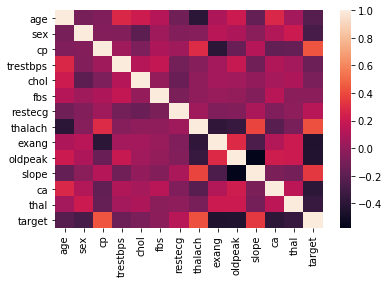

In [9]:
sns.heatmap(data.corr())

# Selecting the variables used to predict

Variables used to predict:
* *age*: age of the patient
* *thalach*: Maximum heart rate achieved

Variable we want to predict:
* *target*: boolean to represent if a patient has a heart disease

### Dataset used to predict

In [130]:
X_disease = disease[['age','thalach']]
X_nodisease = no_disease[['age','thalach']]
X = np.array(data[['age', 'thalach']])
X.shape

(303, 2)

### Values we want to predict

In [131]:
y_disease = disease[['target']]
y_nodisease = no_disease['target']
y = np.array(data['target'])
y.shape

(303,)

# Now let's see our data

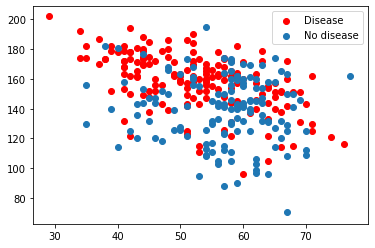

In [132]:
plt.scatter(x=X_disease['age'], y=X_disease['thalach'], c="red", label="Disease")
plt.scatter(x=X_nodisease['age'], y=X_nodisease['thalach'], label="No disease")
plt.legend()
plt.show()

# Now let's prepare the data for our model

In [133]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

### Split into training and test sets

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [135]:
X_train.shape

(212, 3)

In [136]:
X_train[y_train][1]

array([[  1.,  67., 160.]])

In [137]:
y_train.shape

(212, 1)

In [138]:
theta

array([[0.],
       [0.],
       [0.]])

## Functions that will be used to compute a Logistic Regression

In [139]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

## Let's train the model

In [140]:
#Train our model
parameters = fit(X_train, y_train.flatten(), theta)
parameters

array([-4.25603769, -0.0255807 ,  0.03947834])

In [141]:
x_values = [np.min(X_train[:, 1]), np.max(X_train[:, 1])] #Range to plot X axis
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]  #Range to plot y axis

## Now let's plot our model

Select indexes for plotting

In [142]:
idx = y_train.reshape(X_train.shape[0])

Plot the model

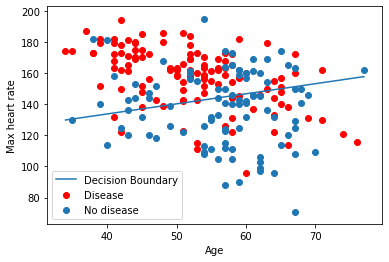

In [143]:
plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(x=X_train[idx==1,1], y=X_train[idx==1,2], c="red", label="Disease")
plt.scatter(x=X_train[idx==0,1], y=X_train[idx==0,2], label="No disease")
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend()
plt.show()

# Test the model using the test set

### Plot the test data

In [144]:
idx = y_test.reshape(X_test.shape[0])
x_values = [np.min(X_test[:, 1]-5), np.max(X_test[:, 1])+5] #Range to plot X axis

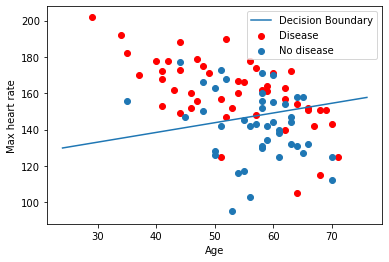

In [145]:
plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(x=X_test[idx==1,1], y=X_test[idx==1,2], c="red", label="Disease")
plt.scatter(x=X_test[idx==0,1], y=X_test[idx==0,2], label="No disease")
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend()
plt.show()

## Functions to predict and to get the accuracy of the model

In [146]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)                         
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100    

Accuracy of the model using the test set 

In [147]:
accuracy(X_test, y_test.flatten())

69.23076923076923

# Conclusions

The model has 69.2% of accuracy in predicting whether a person has a heart disease or not. It is not a bad accuracy, but is not a very good one. The accuracy of the model could be improved by using a different equation for the sigmoid parameter or by including more variables into the model